Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Haitong Lin"
COLLABORATORS = ""

---

Weekly mini-project 4, STATS102 Fall2019 Session 2, Duke Kunshan University, Due at Nov 25th 12:00pm Shanghai time
![](dku.jpg)
For this problem set, we'll be using the Jupyter notebook:
![](jupyter.png) 


Please go to the Kaggle datasets website (https://www.kaggle.com/datasets), search for one dataset that you are interested in.

Remember to report your chosen dataset with a website link in your report.

For the downloaded data, 
- please use Pandas to load it, 
- manipulate it and make 3 not very obvious conclusions or findings from the data, 
- visulize your conclusions or findings with matplotlib (https://matplotlib.org/gallery/index.html),
- and then write annotation and explantion for each line of the code. 

Your report should be in the jupyter notebook framework, and you can directly work on the project on our course cloud.

In order to add a file to your environment, you can go to Files->miniproject4_19fs2 folder to upload.
You can use "Markdown" cells to write your statements and use "Code" cells to write code and draw pictures.

In the beginning, you might want to include the following libraries.

```python
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import numpy as np
import pandas as pd
```

One example is "Visualizing Seattle Bicycle Counts" in https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html (the last part of the page)

Another example is FIFA world cup in https://www.kaggle.com/pavanraj159/fifa-world-cup-1930-to-2014-data-analysis

You can not use the aforementioned two examples, please try to find your interested dataset.

Have a nice weekend!




# Analysis for New York City Airbnb Open Data
Dataset chosen: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

Dataset description: Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

## Data overview:

In [2]:
# YOUR CODE HERE
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import numpy as np
import pandas as pd
data=pd.read_csv('AB_NYC_2019.csv')

## 1. Airbnb distribution in five different boroughs

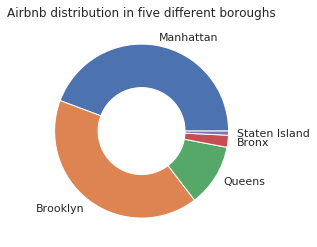

In [3]:
#extracting the data
data1=data.groupby('neighbourhood_group').count().sort_values(by='id',ascending=False)

#set the data and other parameters for the graph
x=list(data1[:5]['id'])
y=[1,0,0,0,0]
label=[data1.index[0],data1.index[1],data1.index[2],data1.index[3],data1.index[4]]

#visualizing the graph with matplotlib
plt.pie(x,labels=label)

#adding in the white circle to make it a ring graph
plt.pie(y,radius=0.5,colors='w')

#setting titles for the graph
plt.title('Airbnb distribution in five different boroughs')
plt.show()

Finding 1: We can see from the graph that Manhattan and Brooklyn have way more Airbnbs than the rest boroughs. This is interesting but also predictable. What is interesting to me is that Queens has significantly more airbnbs than Bronx. This is a overview of the distribution of Airbnbs in NYC, more interesting findings will be listed in the sections below.

## 2. Room type info of the top 10 locations with the most Airbnbs

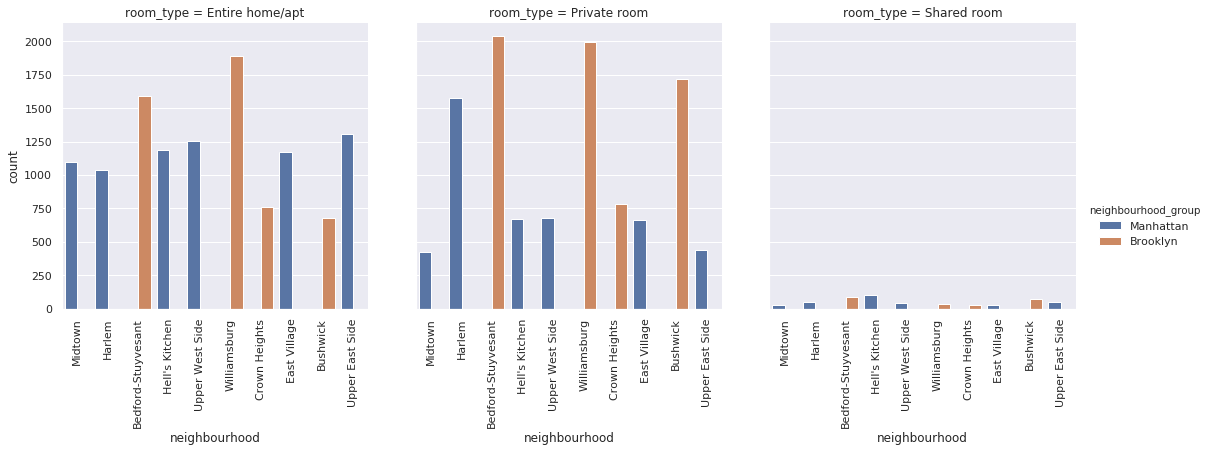

In [4]:
#extracting the data
data2=data.loc[data['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]

#using catplot to visualize data
p2=seaborn.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=data2, kind='count')

#rotate the index so that they won't overlap
p2.set_xticklabels(rotation=90)
p2

Finding 2: There're a lot of interesting findings we can see from these graphs. First of all, we can see that Manhattan has fewer airbnbs per neighbourhood compare to Brooklyn. Brooklyn has a large amount of airbnbs but they are more focused on the popular neighbourhoods like Williamsburg and Bedford-Stuyvesant. In addition we can see that the number of shared room is significantly fewer than the number of a entire home/pricate room. And we can see the (althogh both has a large number), Manhattan has relatively more entire home/apt than private room, while brooklyn has more private rooms than a entire home. I think that shows us that when people travel with family/friends, they have more possibility to stay in the tourist-popular Manhattan and when they travel alone, a private room in Brooklyn might be more ideal.

## 3. Density and distribution of prices for each neighberhood group

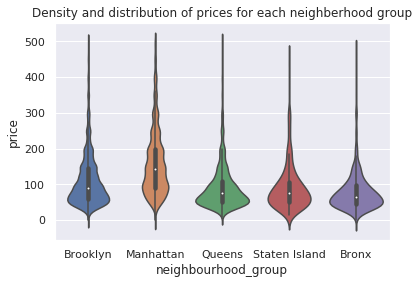

In [5]:
#extracting the data
data3=data[data.price < 500]

#making the violin plot with seaborn
p3=seaborn.violinplot(data=data3, x='neighbourhood_group', y='price')

#set the title of the graph
p3.set_title('Density and distribution of prices for each neighberhood group')

p3

Finding 3: As we can see from the graph, most boroughs have the most Airbnbs' price fall within 0-100, and the two popular boroughs, Brooklyn and Manhattan, have more airbnbs falling in the 100-200 category. And when the price moves to the 200-300 category, we can see it's mainly the airbnbs in manhattan. I think thsi is a interesting result because we can see no matter which borough you choose to stay, you can always find places within the "normal" price range (although the popular area is surely more expensive, it's not a super crazy distribution).